In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [20]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [21]:
from PIML.box.boxWR import BoxWR

In [22]:
b = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [237.89479049284492, 231.5899074293264, 212.89342493592372, 183.25045868063776, 145.70699115718267, 123.32511849667745, 100.63252267710297, 50.80908755189723, 27.653964065567923, 11.117886683058739, 6.989268565218972]
Top10 eigs [180.23  10.52   7.72   2.04   1.68   1.17   0.9    0.71   0.66   0.48]
Building RBF with gaussan kernel on data shape (7776,)
Building RBF with gaussan kernel on data shape (7776, 10)


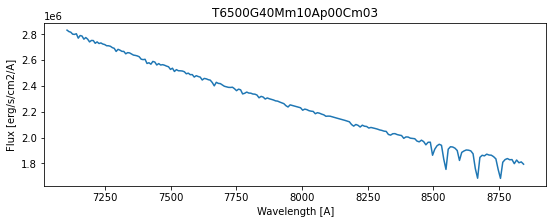

In [23]:
W="RedM"; R="W"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1)

In [24]:
NL, NL2 = 100, 30
b.estimate_snr(NL), b.estimate_snr(NL2)

(10.978909868330431, 35.67801245128998)

In [25]:
diff_10k_100, bias_10k_100,bX = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
# diff_10k_30, bias_10k_30 = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL2)
# diff_1M_100, bias_1M_100 = b.eval_pca_bias(b.PhyMid, 1000000, noise_level=NL)

noise_level 100


In [9]:
diffs = [diff_10k_100, diff_10k_30, diff_1M_100]

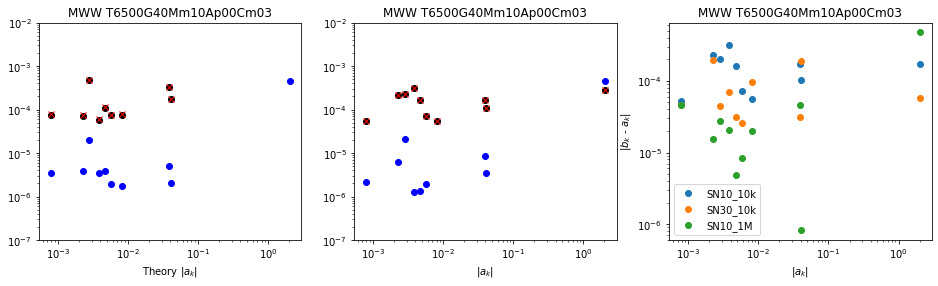

In [26]:
b.plot_bias_evals(diffs, bias_1M_100,bX, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"])

In [12]:
ak = b.rbf_coeff(b.PhyMid)

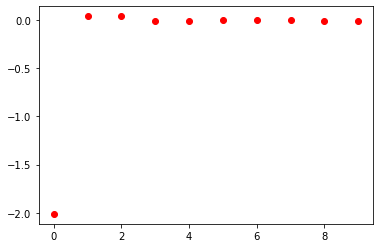

In [15]:
plt.plot(ak, 'ro')

In [16]:
ak

array([-2.01219397e+00,  4.10123220e-02,  3.88338585e-02, -3.76740132e-03,
       -5.74802446e-03, -7.86368317e-04, -2.26835049e-03, -2.79637634e-03,
       -8.21383869e-03, -4.71202909e-03])

In [17]:
b.save_ak()